In [3]:
import pyarrow as pa
import os
import sys
import pandas as pd
import numpy as np
from pathlib import Path
import polars as pl
from typing import Union

notebook_dir = os.path.dirname(os.path.abspath("__file__"))
sys.path.append(notebook_dir)
from src.inference.aws_inference import process_jsonl_files


project_path = "/data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding"
jaspar_file = "/data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/motif.jaspar"  # Update this path
model = "AR-log10"
sample = "22Rv1"


In [ ]:
df = pl.read_parquet(project_path + "/data/processed_results/" + model + "_" + sample + "_processed.parquet")
df

In [ ]:
# get 

In [3]:
# take all the targets that are 1, and an equal number of targets that are 0
df_positive = df.filter(pl.col("targets") == 1)
df_negative = df.filter(pl.col("targets") == 0).sample(n=len(df_positive), seed=42)
df_balanced = pl.concat([df_positive, df_negative])
df_balanced

chr_name,start,end,cell_line,targets,predicted,weights,probabilities,linear_512_output,attributions
str,i64,i64,str,f64,f64,f64,f64,list[list[f64]],list[list[f64]]
"""chr1""",9978,10518,"""22Rv1""",1.0,1.0,6.0,0.992389,"[[4.740002, 4.972241, … 1.652099]]","[[0.005796, 0.0, … -0.012447], [0.0, 0.007487, … -0.017084], … [0.0, 0.0, … -0.031725]]"
"""chr1""",11157,11400,"""22Rv1""",1.0,1.0,1.0,0.96409,"[[0.751917, 1.142118, … -1.503051]]","[[-0.002698, 0.0, … -0.013401], [0.0, 0.0, … -0.022556], … [0.0, 0.0, … -0.058187]]"
"""chr1""",136695,136968,"""22Rv1""",1.0,0.0,1.0,0.003069,"[[-3.824538, -5.680888, … -3.353519]]","[[0.0, 0.0, … 0.001676], [-0.027402, 0.0, … 0.004325], … [0.0, 0.0, … -0.000113]]"
"""chr1""",180781,181003,"""22Rv1""",1.0,1.0,1.0,0.995841,"[[-2.439442, -2.335073, … 1.065612]]","[[0.0, 0.0, … 0.00269], [0.0, 0.0, … -0.020276], … [0.0, 0.0, … 0.000462]]"
"""chr1""",181653,182003,"""22Rv1""",1.0,1.0,1.0,0.999953,"[[1.353126, 1.361969, … 1.213715]]","[[0.0, 0.0, … 0.179431], [0.064184, 0.006617, … 0.132954], … [0.0, 0.0, … -0.000984]]"
…,…,…,…,…,…,…,…,…,…
"""chr11""",6022939,6023453,"""22Rv1""",0.0,0.0,0.0,0.000089,"[[-6.371406, -7.436032, … -8.514706]]","[[0.0, 0.0, … 0.016282], [0.015745, 0.0, … -0.001866], … [0.0, 0.0, … -0.009369]]"
"""chr11""",65127784,65128393,"""22Rv1""",0.0,0.0,0.0,0.000016,"[[-5.773048, -8.30871, … -6.337076]]","[[0.0, 0.0, … 0.000838], [-0.081761, 0.0, … 0.000114], … [0.0, 0.0, … -0.000155]]"
"""chr1""",213931003,213932077,"""22Rv1""",0.0,0.0,0.0,0.000005,"[[-1.750688, -3.76953, … -5.928206]]","[[0.0, 0.0, … 0.078143], [0.0, 0.0, … 0.010061], … [0.0, 0.0, … 0.004238]]"


In [4]:
def reshape_attributions(df):
    # Convert to numpy array first
    attributions = df['attributions'].values
    
    # Create empty array with correct shape
    n_samples = len(df)  # 46218
    reshaped = np.empty((n_samples, 4096, 5))
    
    # Fill the array by properly accessing each (5,) array
    for i, row in enumerate(attributions):
        for j, element in enumerate(row):
            reshaped[i, j] = element

    # Split into ACGT and ATAC components
    attrs_list = reshaped[..., :4].transpose(0, 2, 1)  # Shape: (n_samples, 4, 4096)
    atac_list = reshaped[..., 4]  # Shape: (n_samples, 4096)
            
    return attrs_list, atac_list

# Usage:
attrs_list, atac_list = reshape_attributions(df_positive.to_pandas())
print(f"Attrs shape: {attrs_list.shape}")  # Should be (46218, 4096, 5)
print(f"ATAC shape: {atac_list.shape}")  # Should be (46218, 4096)

Attrs shape: (16434, 4, 4096)
ATAC shape: (16434, 4096)


In [5]:
# Import additional required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style('whitegrid')
from tangermeme.plot import plot_logo
from tangermeme.seqlet import recursive_seqlets

# Get seqlets
def get_seqlets(attrs_list):
    attrs_array = np.stack(attrs_list, axis=0)
    seqlets = recursive_seqlets(attrs_array.sum(axis=1))
    
    nt_idx = {0: 'A', 1: 'C', 2: 'G', 3: 'T'}
    
    # Add sequences to seqlets df
    sequences = []
    for i in range(len(seqlets)):
        sample = seqlets.iloc[i]
        start = int(sample['start'])
        end = int(sample['end'])
        sample_idx = int(sample['example_idx'])
        
        sample_attrs = attrs_array[sample_idx, :, start:end].T.squeeze()
        hits = np.argmax(sample_attrs, axis=1)
        seq = ''.join([nt_idx[i] for i in hits])
        sequences.append(seq)
    seqlets['sequence'] = sequences
    
    return seqlets

# Plot function (simplified version)
def plot_seqlet(seqlets, attrs_list, sample_rank=0, context_size=20):
    sample = seqlets.iloc[[sample_rank]]
    slice = int(sample['example_idx'].tolist()[0])
    sequence = sample['sequence'].tolist()[0]
    start = int(sample['start'].tolist()[0])
    end = int(sample['end'].tolist()[0])
    
    seqlen = end - start
    window_size = seqlen + (context_size * 2)
    
    X_attr = attrs_list[slice]
    X_attr = X_attr.astype(np.float64)
    
    TSS_pos = int(np.mean([start, end]))
    window = (TSS_pos - (window_size // 2), TSS_pos + (window_size // 2))
    
    plt.figure(figsize=(16, 9), dpi=300)
    ax = plt.subplot(111)
    plot_logo(
        X_attr,
        ax=ax,
        start=window[0],
        end=window[1]
    )
    
    plt.xlabel("Genomic Coordinate")
    plt.ylabel("Attributions")
    plt.title(f"DeepLIFT Attributions for sample: {slice} | {sequence}")
    plt.show()

2025-01-22 21:04:11 - WARNING - Matplotlib is building the font cache; this may take a moment.


In [6]:
seqlets = get_seqlets(attrs_list)
seqlets

,example_idx,start,end,attribution,p-value,sequence
0,11604,2000,2006,40.889010,5.347379e-07,ATGTTA
1,7129,2015,2039,-92.353688,1.070404e-06,CAATAAACAACTATACCAGACCAA
2,10919,2029,2034,35.538031,1.164688e-06,TTTAC
3,5164,2082,2093,43.912857,1.201458e-06,TGGTACTACCA
4,5696,2033,2045,-54.555867,1.342483e-06,CCACCAAAAGAA
...,...,...,...,...,...,...
95175,7661,2059,2065,-2.546898,9.839538e-03,AAAAAA
95176,1800,1984,1990,-2.424294,9.839538e-03,AAAACA
95177,15952,2074,2080,-2.500984,9.839538e-03,GAGACA
95178,6997,2023,2029,-2.487932,9.839538e-03,AGACTA


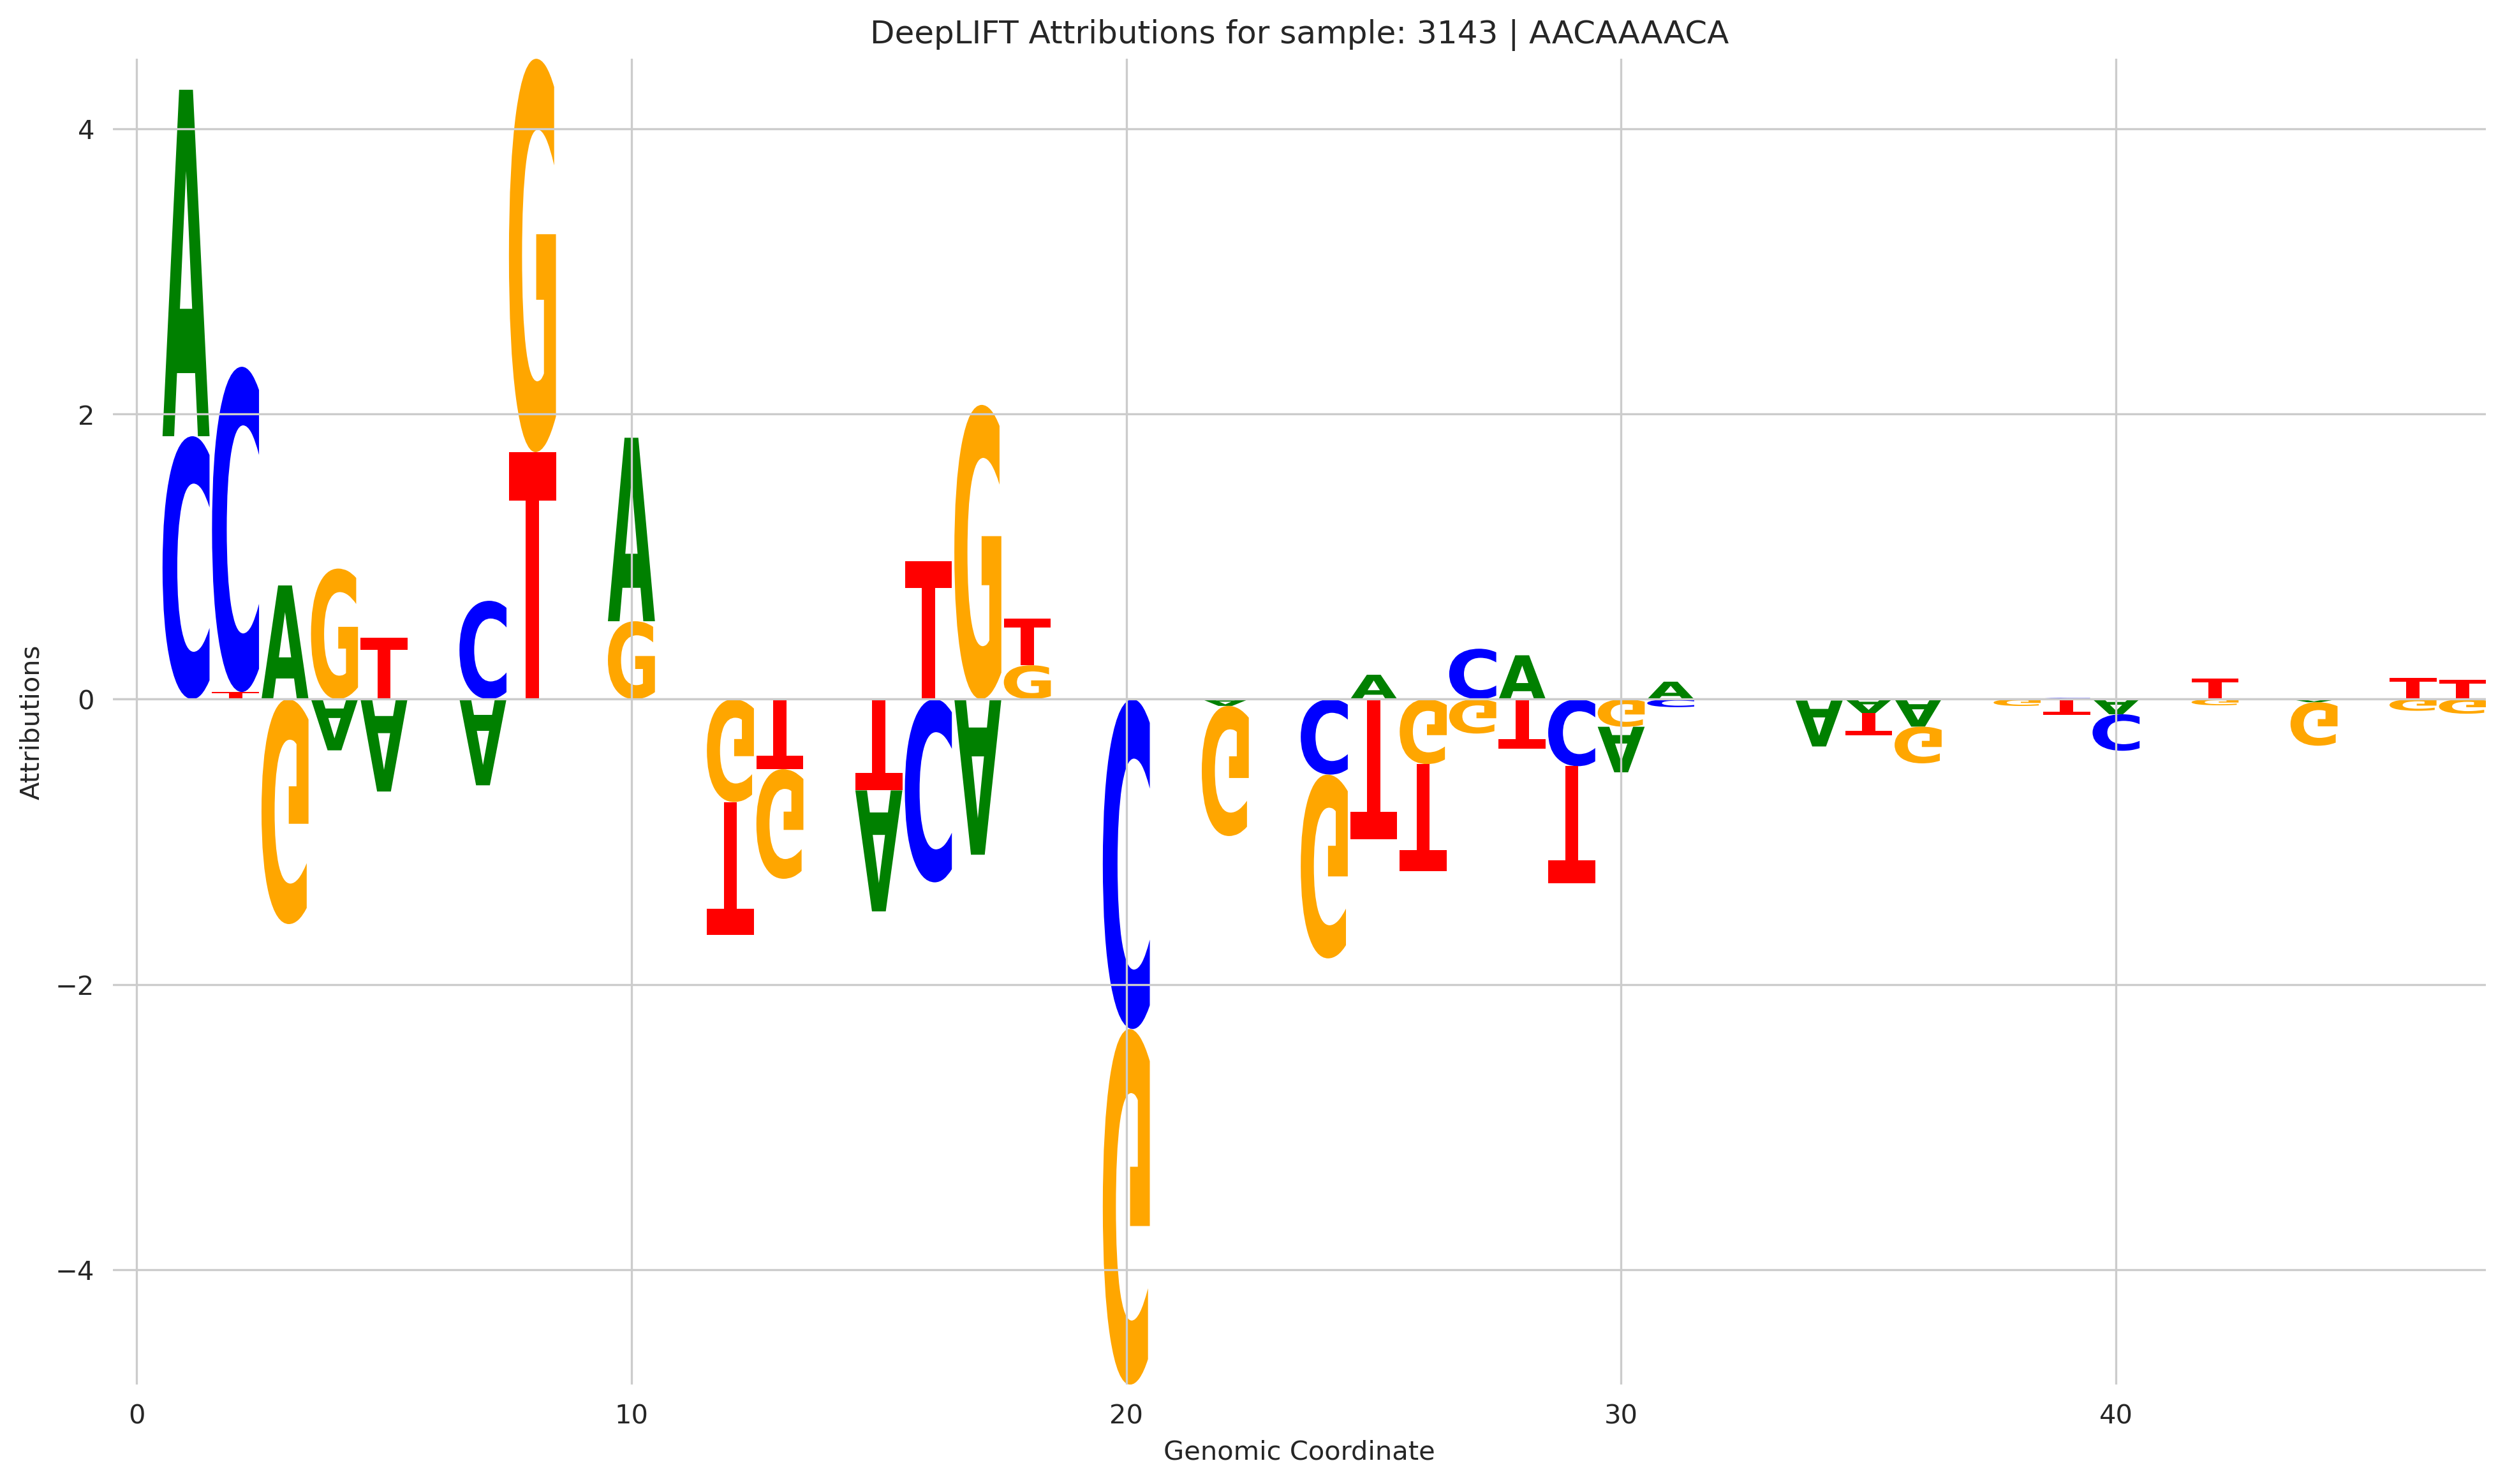

In [7]:
plot_seqlet(seqlets, attrs_list, sample_rank=6127, context_size=20)

In [9]:
from dataclasses import dataclass, field
from typing import List, Tuple

@dataclass
class PWM:
    """Container for position weight matrix data."""
    name: str
    matrix: np.ndarray
    bases: List[str] = field(default_factory=lambda: ['A', 'C', 'G', 'T'])
    
    def get_consensus(self, prob_threshold: float = 0.25) -> str:
        """Get consensus sequence from PWM using IUPAC ambiguity codes."""
        iupac_map = {
            'A': 'A', 'C': 'C', 'G': 'G', 'T': 'T',
            'AC': 'M', 'AG': 'R', 'AT': 'W',
            'CG': 'S', 'CT': 'Y', 'GT': 'K',
            'ACG': 'V', 'ACT': 'H', 'AGT': 'D', 'CGT': 'B',
            'ACGT': 'N'
        }
        
        consensus = []
        for pos_probs in self.matrix.T:
            significant_bases = ''.join(b for b, p in zip(self.bases, pos_probs) 
                                     if p >= prob_threshold)
            significant_bases = ''.join(sorted(significant_bases))
            consensus.append(iupac_map.get(significant_bases, 'N'))
        return ''.join(consensus)

def parse_jaspar(jaspar_file: str) -> PWM:
    """Parse a JASPAR format PWM file."""
    with open(jaspar_file) as f:
        lines = f.readlines()
    
    if not lines or len(lines) != 5:
        raise ValueError("Invalid JASPAR format")
        
    name = lines[0].split()[0]
    matrix = []
    
    for line in lines[1:]:
        nums = line.split('[')[1].split(']')[0].strip().split()
        matrix.append([float(x) for x in nums])
    
    matrix = np.array(matrix)
    matrix = matrix / matrix.sum(axis=0)
    
    return PWM(name=name, matrix=matrix)

pwm = parse_jaspar(jaspar_file)
print(f"Loaded PWM: {pwm.name}")
print(f"Consensus sequence: {pwm.get_consensus()}")


Loaded PWM: >MA0007.2
Consensus sequence: RRGAACASAVWGTTC


In [10]:

def iupac_match(a: str, b: str) -> bool:
    """Check if two IUPAC nucleotide codes match."""
    iupac = {
        'A': {'A'},
        'C': {'C'},
        'G': {'G'},
        'T': {'T'},
        'R': {'A', 'G'},
        'Y': {'C', 'T'},
        'S': {'G', 'C'},
        'W': {'A', 'T'},
        'K': {'G', 'T'},
        'M': {'A', 'C'},
        'B': {'C', 'G', 'T'},
        'D': {'A', 'G', 'T'},
        'H': {'A', 'C', 'T'},
        'V': {'A', 'C', 'G'},
        'N': {'A', 'C', 'G', 'T'}
    }
    
    a = a.upper()
    b = b.upper()
    
    if a not in iupac or b not in iupac:
        raise ValueError(f"Invalid IUPAC code: {a if a not in iupac else b}")
        
    return bool(iupac[a] & iupac[b])


def levenshtein_iupac(seq1: str, seq2: str) -> int:
    """Calculate Levenshtein distance between two DNA sequences with IUPAC codes."""
    if not seq1: return len(seq2)
    if not seq2: return len(seq1)
    
    # Initialize lists instead of range objects
    previous_row = list(range(len(seq2) + 1))
    current_row = [0] * (len(seq2) + 1)
    
    for i, c1 in enumerate(seq1):
        current_row[0] = i + 1
        
        for j, c2 in enumerate(seq2):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (not iupac_match(c1, c2))
            
            current_row[j + 1] = min(insertions, deletions, substitutions)
            
        previous_row, current_row = current_row, [0] * (len(seq2) + 1)  # Reset current_row
        
    return previous_row[-1]


def score_seqlet(pwm: PWM, seq: str) -> Tuple[float, int]:
    """Score a sequence against a PWM using IUPAC-aware Levenshtein distance."""
    from Bio import motifs
    from Bio.Seq import Seq
    
    seq_len = len(seq)
    pwm_width = pwm.matrix.shape[1]
    consensus = pwm.get_consensus()
    
    if seq_len < pwm_width:
        max_score = float('-inf')
        best_pos = 0
        for i in range(pwm_width - seq_len + 1):
            cons_slice = consensus[i:i+seq_len]
            raw_dist = levenshtein_iupac(seq, cons_slice)
            norm_score = 1 - (raw_dist / max(len(seq), len(cons_slice)))
            if norm_score > max_score:
                max_score = norm_score
                best_pos = i
        return max_score, best_pos
    
    elif seq_len == pwm_width:
        raw_dist = levenshtein_iupac(seq, consensus)
        norm_score = 1 - (raw_dist / len(consensus))
        return norm_score, 0
    
    else:
        max_score = float('-inf')
        best_pos = 0
        for i in range(seq_len - pwm_width + 1):
            subseq = seq[i:i+pwm_width]
            raw_dist = levenshtein_iupac(subseq, consensus)
            norm_score = 1 - (raw_dist / len(consensus))
            if norm_score > max_score:
                max_score = norm_score
                best_pos = i
        return max_score, best_pos

In [11]:

from tqdm.notebook import tqdm

scores = []
positions = []
for _, row in tqdm(seqlets.iterrows(), total=len(seqlets)):
    score, pos = score_seqlet(pwm, row['sequence'])
    scores.append(score)
    positions.append(pos)

# Add scores to dataframe
seqlets['pwm_score'] = scores
seqlets['pwm_position'] = positions

# Sort by score and display top matches
top_matches = seqlets.sort_values('pwm_score', ascending=False).head(10)
print("\nTop 10 PWM matches:")
print(top_matches[['sequence', 'pwm_score', 'pwm_position']])

  0%|          | 0/95180 [00:00<?, ?it/s]


Top 10 PWM matches:
      sequence  pwm_score  pwm_position
95127    GAAAG        1.0             7
71062     AAAG        1.0             8
71061    AACAC        1.0             3
71056    AGAAA        1.0             6
95130    AGACA        1.0             6
71026     AGGA        1.0             0
71074     ACAA        1.0             6
71072     CACA        1.0             5
33208     ACAA        1.0             6
95145    AGACA        1.0             6


In [12]:

def write_fasta(sequences, outfile):
    """Write sequences to FASTA format with auto-generated headers."""
    with open(outfile, 'w') as f:
        for i, seq in enumerate(sequences):
            f.write(f'>seq_{i+1}\n{seq}\n')


def save_seqlets(seqlets, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    pos_seqlets = seqlets[seqlets['attribution'] > 0].reset_index(drop=True)
    neg_seqlets = seqlets[seqlets['attribution'] < 0].reset_index(drop=True)

    pos_seqlets.to_csv(os.path.join(output_dir, "positive_seqlets.csv"), 
                       index=False)
    neg_seqlets.to_csv(os.path.join(output_dir, "negative_seqlets.csv"), 
                       index=False)
    
    candidate_motifs = pos_seqlets['sequence'].tolist()
    write_fasta(
        candidate_motifs, 
        outfile=os.path.join(output_dir, "positive_seqlets.fa")
    )



save_seqlets(seqlets, f"/data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/output/{model}_{sample}/")



In [13]:
# run python levenstein.py --jaspar motif.jaspar --seqlets positive_seqlets.csv --output lev_pwm.csv
os.system(f"python /data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/levenstein.py --jaspar /data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/motif.jaspar --seqlets /data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/output/{model}_{sample}/positive_seqlets.csv --output /data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/output/{model}_{sample}/lev_pwm.csv")

2025-01-22 21:24:50,656 - INFO - Loading PWM from /data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/motif.jaspar
2025-01-22 21:24:50,659 - INFO - Consensus sequence: RRGAACASAVWGTTC
2025-01-22 21:24:50,659 - INFO - Loading seqlets from /data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/output/AR-log10_22Rv1/positive_seqlets.csv
2025-01-22 21:24:50,790 - INFO - Scoring seqlets
100%|██████████| 54835/54835 [00:46<00:00, 1191.17it/s]
2025-01-22 21:25:37,010 - INFO - Saving 54835 matches to /data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/output/AR-log10_22Rv1/lev_pwm.csv
2025-01-22 21:25:37,595 - INFO - Summary statistics:
2025-01-22 21:25:37,602 - INFO - Mean score: 0.732
2025-01-22 21:25:37,609 - INFO - Max score: 1.000
2025-01-22 21:25:37,609 - INFO - Number of matches above threshold: 54835


0

In [14]:
min_seqlet = 5
receptor_name = model.split("_")[0]
dir = f"/data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/output/{model}_{sample}"
os.system(f"Rscript /data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/posthoc.R {min_seqlet} {receptor_name} {dir}")


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 54835 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): sequence
dbl (10): example_idx, start, end, attribution, p-value, pwm_score, pwm_posi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 54835 Columns: 8
── Column specification ───────────────────────────────────────────────────────

# A tibble: 12,462 × 2
   sequence     n
   <chr>    <int>
 1 GAACAA     268
 2 GAACA      263
 3 AAACA      226
 4 GAAAA      177
 5 AAAAA      173
 6 TGTAC      164
 7 GAAAAA     161
 8 AAGTA      119
 9 TGTTC      115
10 ATGTA      111
# ℹ 12,452 more rows


Warning message:
Removed 27817 rows containing missing values (`geom_point()`). 
Warning message:
Removed 27817 rows containing missing values (`geom_point()`). 
`geom_smooth()` using formula = 'y ~ x'


Rows: 1,712
Columns: 15
$ example_idx          <dbl> 735, 15109, 15153, 10045, 8435, 15376, 9694, 3957…
$ start                <dbl> 1955, 2032, 2064, 2054, 2165, 2063, 2075, 2105, 2…
$ end                  <dbl> 1971, 2050, 2079, 2069, 2189, 2074, 2090, 2119, 2…
$ attribution.x        <dbl> 68.39016, 63.15618, 55.84173, 51.44297, 50.79100,…
$ `p-value.x`          <dbl> 1.425207e-05, 7.967729e-06, 1.420347e-06, 3.53279…
$ sequence             <chr> "AAACAGAAGGTTCAAG", "GAACCGACGGTACGATTT", "GAACCA…
$ pwm_score.x          <dbl> 0.6666667, 0.5333333, 0.6000000, 0.4666667, 0.666…
$ pwm_position.x       <dbl> 0, 0, 0, 0, 4, 4, 0, 1, 2, 0, 0, 1, 0, 9, 2, 3, 3…
$ attribution.y        <dbl> 68.39016, 63.15618, 55.84173, 51.44297, 50.79100,…
$ `p-value.y`          <dbl> 1.425207e-05, 7.967729e-06, 1.420347e-06, 3.53279…
$ pwm_score.y          <dbl> 0.6666667, 0.5333333, 0.6000000, 0.4666667, 0.666…
$ pwm_position.y       <dbl> 0, 0, 0, 0, 4, 4, 0, 1, 2, 0, 0, 1, 0, 9, 2, 3, 3…
$ levenshtein_sc

0